## 준비

In [ ]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
%cd gdrive/MyDrive/BioSecurity
# root

In [ ]:
# 패키지 import
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 이미지 불러오기

(1350, 1080, 3)


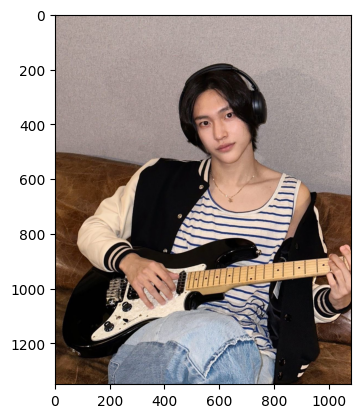

In [ ]:
# imread()는 이미지를 bgr로 읽어옴
bgr_img = cv2.imread('./images/celeb_face_2.jpg')
print(bgr_img.shape)  # (1350, 1080, 3)

# 출력을 위해 rgb로 변환
rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)

# 이미지 출력
plt.imshow(rgb_img)
plt.show()

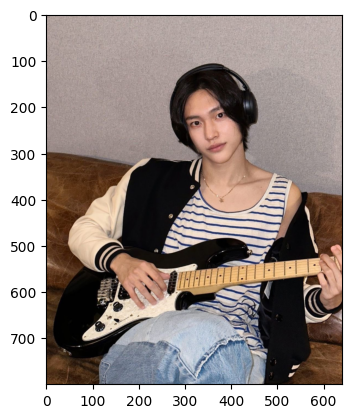

In [ ]:
img = rgb_img

# 이미지 크기 변경 -> with 640으로
w = img.shape[1]  # width 1080

# 비율 맞추기
# fx: 가로 사이즈의 배수 (2배 크게하려면 2, 반으로 줄이려면 0.5) -> width 640으로 만들기 위한 비율 계산하여 저장
fx = 640/w
# fy: 세로 사이즈의 배수 -> width와 동일한 비율
fy = fx

# 비율 지정하여 resize
img = cv2.resize(img, None, fx=fx, fy=fy)

# 이미지 출력
plt.imshow(img)
plt.show()

## Face detection - 얼굴 검출

In [ ]:
# dlib 패키지 사용
import dlib

In [ ]:
# detector 선언
detector_hog = dlib.get_frontal_face_detector()

In [ ]:
# detector에 rgb 이미지를 입력으로 넣기 -> 얼굴의 bounding box 반환
# (image, num of img pyramid)
dlib_rects = detector_hog(img, 1)

In [ ]:
# detector는 dlib.rectangles 타입의 객체를 반환
# dlib.rectangles는 dlib.rectangle 객체의 배열 형태
print(type(dlib_rects))

<class '_dlib_pybind11.rectangles'>


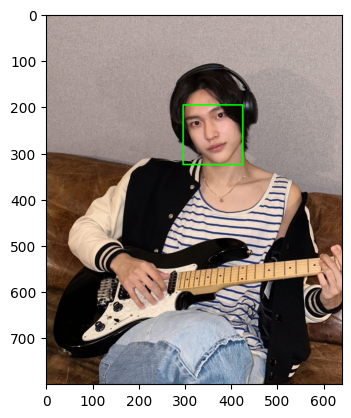

In [ ]:
for dlib_rect in dlib_rects:
    # dlib_rects 객체에 bounding box의 위치 정보 저장됨 -> 함수 호출해서 반환
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    # 이미지에 bounding box 그리기
    cv2.rectangle(img, (l,t), (r,b),
									(0,255,0), 2, lineType=cv2.LINE_AA)

plt.imshow(img)
plt.show()

In [ ]:
print(dlib_rects)
print(l, t, r, b)

# (l, t): bounding box의 왼쪽 위 모서리 좌표
# (r, b): bounding box의 오른쪽 아래 모서리 좌표

rectangles[[(296, 196) (425, 325)]]
296 196 425 325


In [ ]:
# bounding box의 width, height
for dlib_rect in dlib_rects:
    w = dlib_rect.width()
    h = dlib_rect.height()

print(w, h)  # (130, 130)

130 130


## Face recognition - 얼굴 인식

In [ ]:
# face_recognition 라이브러리 사용
!pip install face-recognition
import face_recognition

### [1] 얼굴 검출 (detection)

In [ ]:
# bounding box 찾기: face_locations()
locations = face_recognition.face_locations(img)
print(locations)

# (t, r, b, l)

[(196, 425, 325, 296)]


### [2] 임베딩

In [ ]:
# 임베딩: face_encodings()
# 128차원의 float type 벡터(=각 얼굴)을 원소로 갖는 배열 반환
encodings = face_recognition.face_encodings(img, locations)
print(encodings)

[array([-0.14912149,  0.12040699,  0.05559324, -0.09768808, -0.17451504,
        0.00039569, -0.07912013, -0.12292962,  0.09914685, -0.14043725,
        0.21265879, -0.04664351, -0.2170583 , -0.0399483 , -0.07950546,
        0.19046491, -0.12747467, -0.17110358,  0.00979508,  0.00565726,
        0.10624234,  0.05570733, -0.00930119,  0.03691619, -0.11463223,
       -0.27889436, -0.11298291, -0.00075282, -0.0484826 , -0.02616175,
       -0.0552321 ,  0.02799602, -0.23496613, -0.03683257,  0.03562579,
        0.19606677, -0.00120214, -0.0199293 ,  0.13404146,  0.0025915 ,
       -0.27114406,  0.06277668,  0.08980334,  0.23157057,  0.13606718,
        0.02833725,  0.02054959, -0.17544761,  0.01576219, -0.13023886,
        0.14413027,  0.17565081,  0.11129539,  0.06681331, -0.04705741,
       -0.1376276 ,  0.03674123,  0.13061991, -0.10521635, -0.00289366,
        0.18045081, -0.04459538,  0.01150592, -0.11374948,  0.18513896,
        0.06946864, -0.10214366, -0.21222761,  0.1537309 , -0.1

In [ ]:
print(len(encodings))  # 1
print(len(encodings[0]))  # 128

1
128


### [3] 얼굴 식별 (identification)

#### 얼굴 DB 구축

In [ ]:
# LFW 데이터셋 다운로드
# !wget http://vis-www.cs.umass.edu/lfw/lfw.tgz

In [ ]:
# !tar zxvf lfw.tgz

In [ ]:
# 패키지 import
import os
from os.path import join
from glob import glob
from tqdm.notebook import tqdm  # 진행 상황 표시 패키지

In [ ]:
# 편의를 위해 bgr 이미지를 rgb로 출력하는 show() 함수 정의
def show(img_bgr):
    plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
    plt.show()

In [ ]:
# 데이터셋 경로
lfw_dir = './lfw'
list_human = sorted(glob(join(lfw_dir, '*')))
print(list_human[:3])
# ['./lfw/AJ_Cook', './lfw/AJ_Lamas', './lfw/Aaron_Eckhart']

# LFW 데이터셋의 모든 jpg 경로를 정렬하여 리스트에 저장
list_jpg = sorted(glob(join(lfw_dir, '*/*.jpg')))
print(len(list_jpg), list_jpg[:10])

list_img = []
for jpg_path in tqdm(list_jpg):
    # 이미지를 읽고 리스트에 저장
    # 인자 1(IMREAD_COLOR) -> 이미지를 bgr(color)로 읽기
    list_img.append(cv2.imread(jpg_path, 1))

# 전체 13233개 이미지 중 803개만 저장

In [ ]:
# 넘파이 배열로 변환
np_imgs = np.array(list_img)
print(np_imgs.shape)

# (803, 250, 250, 3) -> 250x250 color image가 803개

(803, 250, 250, 3)


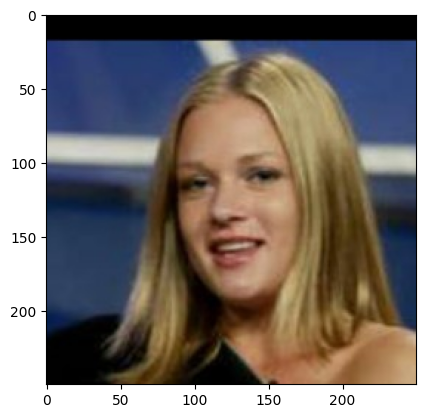

In [ ]:
# 배열의 첫 번째 이미지 출력
show(list_img[0])

#### 얼굴 DB 임베딩

In [ ]:
np_embs = np.zeros((len(list_img), 128))

for idx, img in enumerate(tqdm(list_img)):
    # 얼굴 검출
    locations = face_recognition.face_locations(img)
    # 임베딩
    encodings = face_recognition.face_encodings(img, locations)
    if len(encodings) > 0:
        np_embs[idx] = encodings[0]

print(np_embs.shape)
# 총 803개의 128차원 얼굴 벡터
# (803, 128)

  0%|          | 0/803 [00:00<?, ?it/s]

(803, 128)


#### 내 얼굴 이미지 임베딩

In [ ]:
# 내 이미지 모두 불러오기
face_path = sorted(glob('./images/celeb_face*.jpg'))

# 이미지를 읽고 반으로 resize하여 리스트에 저장
list_img_user = [cv2.resize(cv2.imread(p), None, fx=0.5, fy=0.5) for p in face_path]

# 각 이미지의 shape 출력
for img in list_img_user:
    print(img.shape)

(488, 325, 3)
(675, 540, 3)
(907, 640, 3)


In [ ]:
np_embs_user = np.zeros((len(list_img_user), 128))

for idx, img in enumerate(tqdm(list_img_user)):
    # 얼굴 검출
    locations = face_recognition.face_locations(img)
    # 임베딩
    encodings = face_recognition.face_encodings(img, locations)
    if len(encodings) > 0:
        np_embs_user[idx] = encodings[0]
    else:
        print(idx, 'no face')

  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
print(np_embs_user.shape)
# 총 3개의 128차원 얼굴 벡터
# (3, 128)

(3, 128)


#### LFW DB와 내 얼굴 이미지 비교

In [ ]:
# 0번 이미지와 LFW DB의 거리
np_dist_user_db = np.linalg.norm(np_embs_user[0] - np_embs, axis=1)

# 0번 이미지와 내 이미지 전체의 거리
np_dist_user_user = np.linalg.norm(np_embs_user[0] - np_embs_user, axis=1)

# LFW DB 1번 이미지와 전체 DB의 거리
np_dist_db_db = np.linalg.norm(np_embs[1] - np_embs, axis=1)

In [ ]:
# 0번 이미지와 내 이미지 전체의 거리
print(np_dist_user_user)

# -> 0번 이미지(자기자신)과의 거리, 1번 이미지와의 거리, 2번 이미지와의 거리

[0.         0.56954985 0.61414341]


In [ ]:
# 0번 이미지와 LFW DB의 거리 (100개만 출력)
print(np_dist_user_db[:100])

[0.86965262 0.76351033 0.88282959 0.86016514 0.85324977 0.76789403
 0.77082898 0.78560235 0.77872071 0.71929916 0.73322098 0.79754772
 0.73473058 0.82456173 0.66222191 0.79449567 0.74229284 0.80510129
 0.74448575 0.85484814 0.84300182 1.35119955 0.87847252 0.66194149
 0.75061623 0.80730777 0.73996685 0.75237523 0.70416401 0.68133723
 0.70983316 0.77935434 0.80507127 0.72778124 0.75039739 0.80027264
 0.83252523 0.79830566 0.80361998 0.70905248 0.7802805  0.80707218
 0.78036542 0.79321581 0.76326785 0.77242929 0.76805199 0.76089371
 0.82470366 0.76513243 0.70747812 0.76488555 0.73486136 0.72400229
 0.76117716 0.67271353 0.77716195 0.69984216 0.76082439 0.76081575
 0.75196112 0.69103024 0.69520437 0.68337524 0.68063615 0.71866664
 0.85223207 0.78070437 0.77370057 0.78639705 0.80737413 0.68430198
 0.76013814 0.75869702 0.78033027 0.77383938 0.75499852 0.70614956
 0.681852   0.72692602 0.75590297 0.76527267 0.81267414 0.70753761
 0.70432191 0.73528266 0.74220869 0.77380208 0.76338353 0.7883

0.5822911661703865


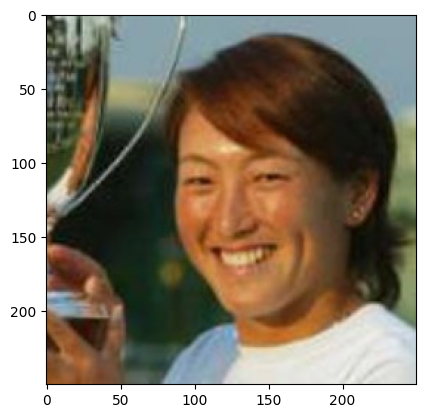

In [ ]:
# LFW DB 내에서 0번 이미지와 가장 가까운(=거리가 최솟값인) 얼굴 출력

# 최솟값 출력
print(np_dist_user_db.min())
# 0.58

# 최솟값 가지는 인덱스 찾고 이미지 출력
show(list_img[np_dist_user_db.argmin()])